# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('data/grades.csv')

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [6]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [7]:
df['國文']

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<AxesSubplot:>

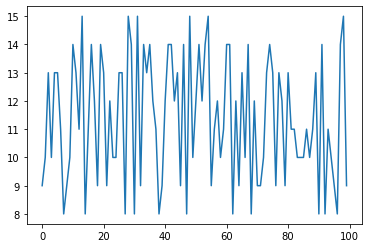

In [8]:
df.國文.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<AxesSubplot:>

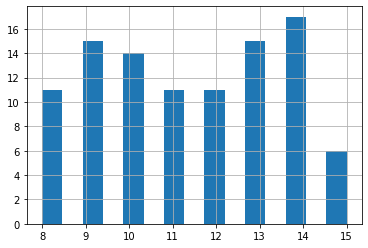

In [12]:
df.國文.hist(bins=15)

## 3 一些基本的資料分析

算平均。

In [13]:
df.國文.mean()

11.39

算標準差。

In [14]:
df.國文.std()

2.1968526614594834

不如就該算的都幫我們算算...

In [15]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [16]:
df.corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [17]:
df.國文.corr(df.數學)

-0.3108989822179331

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [19]:
df['總級分']=df.sum(axis=1)
df.head()

/var/folders/8v/6y9ty40n6l56hhp59z__bq080000gn/T/ipykernel_30765/1616469875.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['總級分']=df.sum(axis=1)


,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,114
1,胡玉華,10,10,10,8,9,94
2,黃淑婷,13,15,8,11,14,122
3,陳上紫,10,10,8,9,14,102
4,崔靜成,13,12,14,12,13,128


### 【技巧】

有計算的當然也可以的。

In [21]:
df['加權']= df.國文+df.英文+df.數學*2
df.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,114,49
1,胡玉華,10,10,10,8,9,94,40
2,黃淑婷,13,15,8,11,14,122,44
3,陳上紫,10,10,8,9,14,102,36
4,崔靜成,13,12,14,12,13,128,53


,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,49
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,44
3,陳上紫,10,10,8,9,14,51,36
4,崔靜成,13,12,14,12,13,64,53


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [22]:
df.sort_values(by='總級分',ascending=False).head(10)


,姓名,國文,英文,數學,自然,社會,總級分,加權
80,施雅鈴,13,15,12,13,13,132,52
12,李正偉,11,15,11,14,15,132,48
54,陳怡潔,15,15,9,15,11,130,48
25,蔡亦瑄,13,13,14,13,12,130,54
57,胡淳茜,12,15,14,13,11,130,55
37,曾怡君,11,12,15,13,14,130,53
48,陳怡婷,15,14,12,9,15,130,53
64,俞志峰,9,14,13,14,15,130,49
83,李士賢,10,14,15,13,13,130,54
87,趙偉希,10,13,14,13,15,130,51


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [30]:
df2=df.sort_values(by=['加權','總級分'],ascending=False)


### 【重點】重設 index

In [31]:
df2.index=range(1,101)
df2.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,118,58
2,胡淳茜,12,15,14,13,11,130,55
3,詹威德,12,13,15,10,14,128,55
4,蔡亦瑄,13,13,14,13,12,130,54
5,李士賢,10,14,15,13,13,130,54


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [32]:
df2[df2.數學==15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,118,58
3,詹威德,12,13,15,10,14,128,55
5,李士賢,10,14,15,13,13,130,54
7,曾怡君,11,12,15,13,14,130,53
10,林哲法,14,9,15,10,14,124,53
13,陳竹伯,10,12,15,10,14,122,52
15,葉儀依,9,13,15,8,14,118,52
18,周育霖,9,12,15,13,12,122,51
21,張雅彬,10,11,15,12,8,112,51
22,芮秋辛,11,10,15,10,8,108,51


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [44]:
df2[df2.數學==15],[df2.英文==15]

(     姓名  國文  英文  數學  自然  社會  總級分  加權
 1   吳志遠  13  15  15   8   8  118  58
 3   詹威德  12  13  15  10  14  128  55
 5   李士賢  10  14  15  13  13  130  54
 7   曾怡君  11  12  15  13  14  130  53
 10  林哲法  14   9  15  10  14  124  53
 13  陳竹伯  10  12  15  10  14  122  52
 15  葉儀依   9  13  15   8  14  118  52
 18  周育霖   9  12  15  13  12  122  51
 21  張雅彬  10  11  15  12   8  112  51
 22  芮秋辛  11  10  15  10   8  108  51
 25  胡勝傑   8  11  15  10  15  118  49
 26  劉俊安   9  10  15  10  13  114  49
 42  段冠廷   9   8  15  12  15  118  47,
 [1       True
  2       True
  3      False
  4      False
  5      False
         ...  
  96     False
  97     False
  98     False
  99     False
  100    False
  Name: 英文, Length: 100, dtype: bool])

## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [50]:
df2.drop('總級分',axis=1)
df2

KeyError: "['總級分'] not found in axis"

### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [51]:
df.drop('總級分',axis=1,inplace=True)
df2

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [52]:
df2.drop(5).head()

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54


,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [54]:
df2.drop(df2[df2.姓名=='李士賢'].index)

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [57]:
import pandas_datareader as pdr
df = pdr.get_data_yahoo('AAPL')

In [2]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

In [56]:
import pandas_datareader as pdr
df = pdr.get_data_yahoo('AAPL')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-15,39.162498,38.762501,39.002499,38.924999,104038800.0,36.848976
2017-05-16,39.014999,38.680000,38.985001,38.867500,80194000.0,36.794537
2017-05-17,38.642502,37.427502,38.400002,37.562500,203070800.0,35.559151
2017-05-18,38.334999,37.782501,37.817501,38.134998,134272800.0,36.101109
2017-05-19,38.494999,38.157501,38.345001,38.264999,107843200.0,36.224167


#### 只要最後 300 個交易日!

In [57]:
df=df[-300:]
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-09,122.059998,118.790001,119.029999,121.089996,129525800.0,120.197952
2021-03-10,122.169998,119.449997,121.690002,119.980003,111943300.0,119.096130
2021-03-11,123.209999,121.260002,122.540001,121.959999,103026500.0,121.061531
2021-03-12,121.169998,119.160004,120.400002,121.029999,88105100.0,120.138397
2021-03-15,124.000000,120.419998,121.410004,123.989998,92403800.0,123.076584
...,...,...,...,...,...,...
2022-05-09,155.830002,151.490005,154.929993,152.059998,131577900.0,152.059998
2022-05-10,156.740005,152.929993,155.520004,154.509995,115366700.0,154.509995
2022-05-11,155.449997,145.809998,153.500000,146.500000,142689800.0,146.500000


#### 20 日的移動平均

Date
2021-03-09           NaN
2021-03-10           NaN
2021-03-11           NaN
2021-03-12           NaN
2021-03-15           NaN
                 ...    
2022-05-09    162.206000
2022-05-10    161.643999
2022-05-11    160.585999
2022-05-12    159.193999
2022-05-13    158.285000
Name: Close, Length: 300, dtype: float64

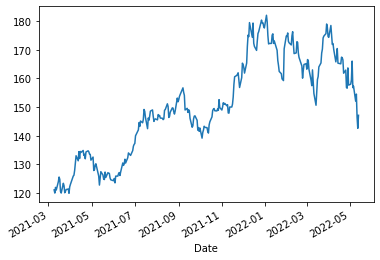

In [60]:
df.Close.plot()
df.Close.rolling(20).mean()

<AxesSubplot:xlabel='Date'>

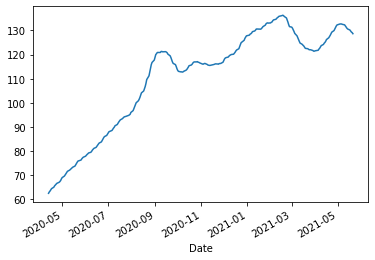

#### 20 日和 60 日的移動平均

<AxesSubplot:xlabel='Date'>

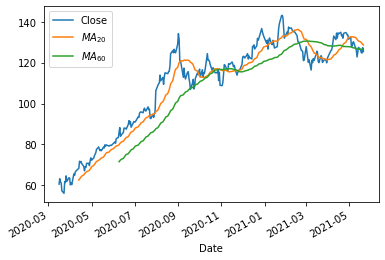

In [68]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [63]:
close=df.Close.values
len(close)

300

In [65]:
x=close[:-1]
len(x)


299

In [67]:
y=close[1:]
len(y)

299

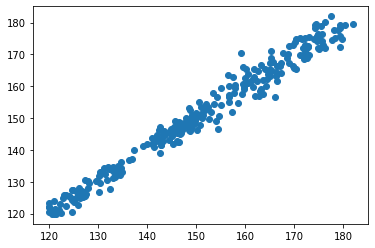

In [70]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [71]:
mydata = np.random.randn(4,3)

In [73]:
mydata = np.random.randn(4,3)

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [74]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [75]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [88]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [76]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [79]:
df4 = pd.concat([df2,df3],axis=0)

,A,B,C
0,-2.552313,1.906824,-0.201567
1,1.017096,-0.032225,-0.379340
2,-0.251371,1.026546,2.267663
3,-0.068840,-0.611686,0.174140
0,-0.171660,1.542380,2.685066
1,0.786684,-1.182996,0.401870
2,-2.216455,0.299553,-1.112735


前面我們弄得亂七八糟的 index 重設一下。

In [80]:
df4.index = range(7)

,A,B,C
0,-2.552313,1.906824,-0.201567
1,1.017096,-0.032225,-0.379340
2,-0.251371,1.026546,2.267663
3,-0.068840,-0.611686,0.174140
4,-0.171660,1.542380,2.685066
5,0.786684,-1.182996,0.401870
6,-2.216455,0.299553,-1.112735


#### 横向的貼

In [81]:
df5 = pd.concat([df2,df3],axis=1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [82]:
df5

,A,B,C,A,B,C
0,-1.675368,1.497699,-0.071430,-0.459603,-0.938980,-1.097568
1,-0.063706,-1.736392,-0.538216,0.264580,-0.052279,0.056286
2,-1.159401,-1.858655,-0.206066,-1.286681,0.279324,-0.398102
3,-1.106379,1.192531,0.965118,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [83]:
df_names = pd.read_csv('data/names.csv',names=['姓名'])

In [84]:
df_names.head()

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮


In [87]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [89]:
df_grades.to_csv()

,國文,英文,數學,社會,自然
0,15,6,9,12,7
1,13,10,8,7,11
2,7,10,15,7,10
3,15,7,6,11,14
4,10,8,6,6,13
...,...,...,...,...,...
95,10,15,12,6,12
96,6,8,6,7,12
97,15,6,8,9,6
98,14,6,12,6,8


In [91]:
df_grades.to_csv('data/grade2.csv',index=0)
df_grades=pd.read_csv('data/grade2.csv')
df_grades

,Unnamed: 0,國文,英文,數學,社會,自然
0,0,15,6,9,12,7
1,1,13,10,8,7,11
2,2,7,10,15,7,10
3,3,15,7,6,11,14
4,4,10,8,6,6,13
...,...,...,...,...,...,...
95,95,10,15,12,6,12
96,96,6,8,6,7,12
97,97,15,6,8,9,6
98,98,14,6,12,6,8


,姓名,Unnamed: 0,國文,英文,數學,社會,自然
0,羅雅慧,0,12,6,6,8,12
1,王紹尹,1,10,6,13,13,6
2,黃季坤,2,11,14,13,13,11
3,許正書,3,10,13,13,14,12
4,張鈞蓮,4,8,13,14,9,13
...,...,...,...,...,...,...,...
95,陳君生,95,11,9,13,14,10
96,曾桂甫,96,14,9,12,11,9
97,林欣怡,97,15,8,13,14,14
98,林佳霖,98,8,11,9,7,10


In [93]:
df_x=pd.concat([df_names,df_grades],axis=1)

In [94]:
df_x

,姓名,Unnamed: 0,國文,英文,數學,社會,自然
0,羅雅慧,0,15,6,9,12,7
1,王紹尹,1,13,10,8,7,11
2,黃季坤,2,7,10,15,7,10
3,許正書,3,15,7,6,11,14
4,張鈞蓮,4,10,8,6,6,13
...,...,...,...,...,...,...,...
95,陳君生,95,10,15,12,6,12
96,曾桂甫,96,6,8,6,7,12
97,林欣怡,97,15,6,8,9,6
98,林佳霖,98,14,6,12,6,8
